In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Simple Linear Regression

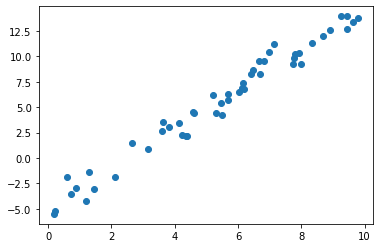

In [6]:
rng = np.random.RandomState(0)
x = 10*rng.rand(50)
y = 2*x-5+rng.randn(50)
plt.scatter(x,y)

In [8]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept = True)
model.fit(x[:,np.newaxis], y)

LinearRegression()

In [17]:
xfit = np.linspace(0,10, 1000)
yfit = model.predict(xfit[:,np.newaxis])

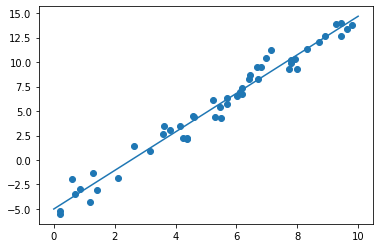

In [18]:
plt.scatter(x,y)
plt.plot(xfit, yfit)

In [20]:
print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_)

Model slope:     1.9692732947309528
Model intercept: -5.0072100841302785


in addition to simple straight-line fits, it can also handle multidimensional linear models of the form

y=a0+a1x1+a2x2+⋯

where there are multiple x values. Geometrically, this is akin to fitting a plane to points in three dimensions, or fitting a hyper-plane to points in higher dimensions.

In [32]:
rng = np.random.RandomState(1)
X = 10 * rng.rand(100, 3)
y = 0.5 + np.dot(X, [1.5, -2., 1.])

In [36]:
model.fit(X,y)

LinearRegression()

In [37]:
print(model.coef_)
print(model.intercept_)

[ 1.5 -2.   1. ]
0.5000000000000127


# Basis Function Regression

One trick you can use to adapt linear regression to nonlinear relationships between variables is to transform the data according to basis functions. 

For example, if fn(x)=xn, our model becomes a polynomial regression:

y=a0+a1x+a2x2+a3x3+⋯

Notice that this is still a linear model—the linearity refers to the fact that the coefficients an never multiply or divide each other.

## Polynomial Basis Function

In [38]:
from sklearn.preprocessing import PolynomialFeatures

In [43]:
x = np.array([2,3,4])
poly = PolynomialFeatures(3, include_bias=False)
poly.fit_transform(x[:, np.newaxis])

array([[ 2.,  4.,  8.],
       [ 3.,  9., 27.],
       [ 4., 16., 64.]])

In [44]:
from sklearn.pipeline import make_pipeline
poly_model = make_pipeline(PolynomialFeatures(7),
                          LinearRegression())

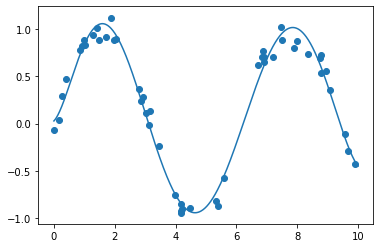

In [49]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50)
plt.scatter(x, y)

poly_model.fit(x[:, np.newaxis], y)
yfit = poly_model.predict(xfit[:, np.newaxis])
plt.plot(xfit, yfit);

## Gaussian Basis Functions

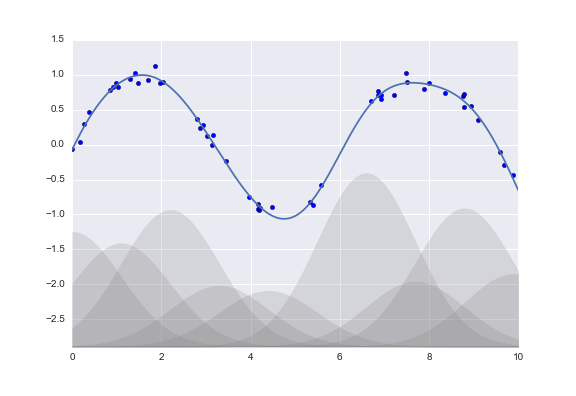

The shaded regions in the plot are the scaled basis functions, and when added together they reproduce the smooth curve through the data. 

# READ THE BELOW CODE AGAIN!!!

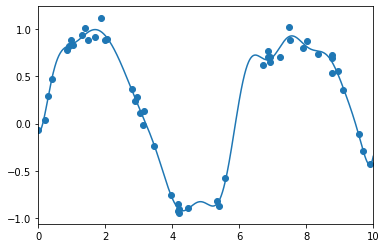

In [50]:
from sklearn.base import BaseEstimator, TransformerMixin

class GaussianFeatures(BaseEstimator, TransformerMixin):
    """Uniformly spaced Gaussian features for one-dimensional input"""
    
    def __init__(self, N, width_factor=2.0):
        self.N = N
        self.width_factor = width_factor
    
    @staticmethod
    def _gauss_basis(x, y, width, axis=None):
        arg = (x - y) / width
        return np.exp(-0.5 * np.sum(arg ** 2, axis))
        
    def fit(self, X, y=None):
        # create N centers spread along the data range
        self.centers_ = np.linspace(X.min(), X.max(), self.N)
        self.width_ = self.width_factor * (self.centers_[1] - self.centers_[0])
        return self
        
    def transform(self, X):
        return self._gauss_basis(X[:, :, np.newaxis], self.centers_,
                                 self.width_, axis=1)
    
gauss_model = make_pipeline(GaussianFeatures(20),
                            LinearRegression())
gauss_model.fit(x[:, np.newaxis], y)
yfit = gauss_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit)
plt.xlim(0, 10);

Basis funcions makes the model more flexible but prone to obver fitting

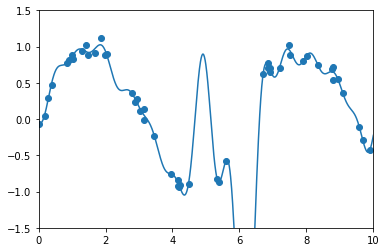

In [51]:
model = make_pipeline(GaussianFeatures(30),
                      LinearRegression())
model.fit(x[:, np.newaxis], y)

plt.scatter(x, y)
plt.plot(xfit, model.predict(xfit[:, np.newaxis]))

plt.xlim(0, 10)
plt.ylim(-1.5, 1.5);

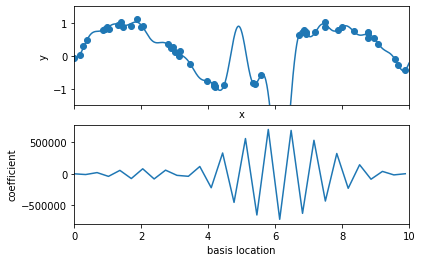

In [63]:
def basis_plot(model, title=None):
    fig, ax = plt.subplots(2, sharex=True)
    model.fit(x[:, np.newaxis], y)
    ax[0].scatter(x, y)
    ax[0].plot(xfit, model.predict(xfit[:, np.newaxis]))
    ax[0].set(xlabel='x', ylabel='y', ylim=(-1.5, 1.5))
    
    if title:
        ax[0].set_title(title)

    ax[1].plot(model.steps[0][1].centers_,
               model.steps[1][1].coef_)
    ax[1].set(xlabel='basis location',
              ylabel='coefficient',
              xlim=(0, 10))
    
model = make_pipeline(GaussianFeatures(30), LinearRegression())
basis_plot(model)

the coefficients of adjacent basis functions blow up and cancel each other out.

# Reguarization

## Ridge Regression (L2 Regularization)

Also called Tikhonov regularization. 
This proceeds by penalizing the sum of squares (2-norms) of the model coefficients; in this case, the penalty on the model fit would be
P=α∑n=1Nθ2n
where α is a free parameter that controls the strength of the penalty. 

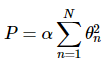

This proceeds by penalizing the sum of squares (2-norms) of the model coefficients; in this case, the penalty on the model fit would be
where α is a free parameter that controls the strength of the penalty. 

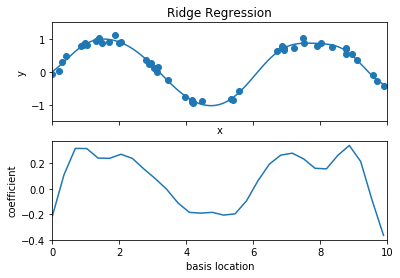

In [68]:
from sklearn.linear_model import Ridge
model = make_pipeline(GaussianFeatures(30), Ridge(alpha=0.1))
basis_plot(model, title = 'Ridge Regression')

In the limit α→0, we recover the standard linear regression result; in the limit α→∞, all model responses will be suppressed.

One advantage of ridge regression in particular is that it can be computed very efficiently—at hardly more computational cost than the original linear regression model.

## Lasso Regression (L1 Regularization)

involves penalizing the sum of absolute values (1-norms) of regression coefficients

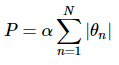

Although conceptually very similar to ridge regression, the results can differ surprisingly: for example, due to geometric reasons lasso regression tends to favor sparse models where possible

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.002135815870486668, tolerance: 0.002065280097246271
  positive)


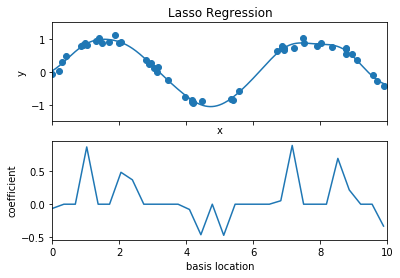

In [69]:
from sklearn.linear_model import Lasso
model = make_pipeline(GaussianFeatures(30), Lasso(alpha=0.001))
basis_plot(model, title='Lasso Regression')